Problem 5:
Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Accel Partners 53
Sequoia Capital 51
Kalaari Capital 39
Blume Ventures 31
SAIF Partners 26


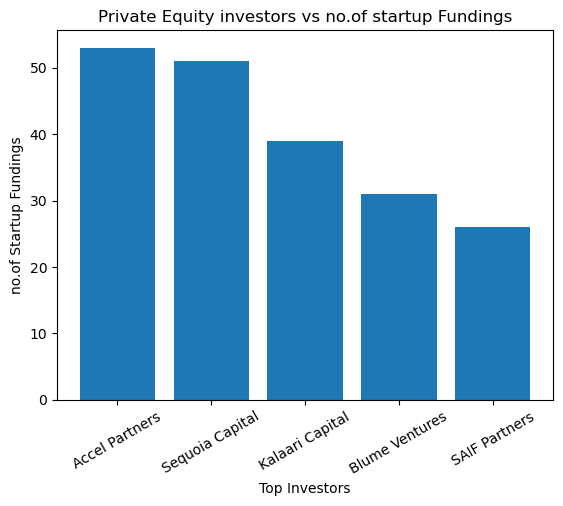

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
df=pd.read_csv("startup_funding.csv",encoding = 'utf-8')
df.dropna(subset=['Investors Name','InvestmentnType','Startup Name'],inplace=True)
df['Startup Name'].replace("OYO Rooms","Oyo",inplace=True)
df['Startup Name'].replace("OyoRooms","Oyo",inplace=True)
df['Startup Name'].replace("OYOfit","Oyo",inplace=True)
df['Startup Name'].replace("Ola Cabs","Ola",inplace=True)
df['Startup Name'].replace("Olacabs","Ola",inplace=True)
df['Startup Name'].replace("Ola Electric","Ola",inplace=True)
df['Startup Name'].replace("Flipkart.com","Flipkart",inplace=True)
df['Startup Name'].replace("Paytm Marketplace","Paytm",inplace=True)

#df['InvestmentnType'].replace('Private Equity Round','Private Equity',inplace=True)
df['InvestmentnType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentnType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentnType'].replace('Crowd funding','Crowd Funding',inplace=True)

df=df[df['Investors Name']!="Undisclosed Investors"]
df=df[df['Investors Name']!="Undisclosed investors"]
df=df[df['Investors Name']!="unknown"]
df=df[df['Investors Name']!="N/A"]

investor_names=[]
startup_names=[]
investment_type=[]
for index,row in df.iterrows():
    i=row['Investors Name']
    s=row['Startup Name']
    inv=row['InvestmentnType']
    if i!="" and i!="Undisclosed Investors":
        temp=i.split(",")
        for j in temp:
            if j!="" and inv=="Private Equity":
                investor_names.append(j.strip())
                startup_names.append(s)
df1=pd.DataFrame({'Investors': investor_names,'Startups': startup_names})
df1=df1.groupby('Investors')['Startups'].nunique()
df1=df1.sort_values(ascending=False)[:10]
names=[]
fields=[]
c=0
for i in range(len(df1)):
    if df1.index[i]!="" and c<5:
        names.append(df1.index[i])
        fields.append(df1.values[i])
        print(df1.index[i],df1.values[i])
        c+=1
plt.bar(names,fields)
plt.xticks(rotation=30)
plt.xlabel("Top Investors")
plt.ylabel("no.of Startup Fundings")
plt.title("Private Equity investors vs no.of startup Fundings")
plt.show()